In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta

data = pd.read_csv("executions.csv")
data.head()

,region,algoritmo,aeropuertos,agentes,tiempo
0,Estrella,random,7,6,0:00:00.299185
1,Estrella,random,7,5,0:00:00.297085
2,Estrella,random,7,4,0:00:00.286628
3,Estrella,random,7,5,0:00:00.305939
4,Estrella,random,7,3,0:00:00.265670


In [2]:
def convert_delta(delta):
    delta = datetime.strptime(delta, "%H:%M:%S.%f")
    delta = timedelta(hours=delta.hour, minutes=delta.minute, seconds=delta.second, microseconds = delta.microsecond)
    return delta 

data["tiempo"] = data.tiempo.apply(convert_delta)
data.head()

,region,algoritmo,aeropuertos,agentes,tiempo
0,Estrella,random,7,6,0 days 00:00:00.299185
1,Estrella,random,7,5,0 days 00:00:00.297085
2,Estrella,random,7,4,0 days 00:00:00.286628
3,Estrella,random,7,5,0 days 00:00:00.305939
4,Estrella,random,7,3,0 days 00:00:00.265670


In [63]:
data["algoritmo"].replace("swarm_15", "swarm", inplace = True)
data.tiempo.mean()

Timedelta('0 days 00:00:16.696429648')

In [64]:
data.loc[data.region.isin(["Multihub", "Grande50", "Grande66"])].groupby(["region", "algoritmo"]).tiempo.agg([lambda x: x.mean(), lambda x: x.median(), "count"]).rename(columns = {"<lambda_0>":"mean_time", "<lambda_1>": "median_time"})

mean_time  \
region   algoritmo                                       
Grande50 busqueda_local      0 days 00:00:00.620512790   
         busqueda_local_iter 0 days 00:00:18.471809110   
         grasp_10            0 days 00:00:24.430617200   
         grasp_15            0 days 00:00:26.370218510   
         grasp_3             0 days 00:00:21.062974900   
         grasp_5             0 days 00:00:22.204855990   
         greedy              0 days 00:00:00.747634570   
         random              0 days 00:00:00.294310630   
         swarm               0 days 00:22:06.511637533   
Grande66 busqueda_local      0 days 00:00:00.861097900   
         busqueda_local_iter    0 days 00:00:03.382114   
         grasp_10            0 days 00:00:04.753573800   
         grasp_15            0 days 00:00:05.601916200   
         grasp_3             0 days 00:00:03.904058280   
         grasp_5             0 days 00:00:04.134085300   
         greedy              0 days 00:00:00.404342330   
         random              0 days 00:00:00.282587130   
         swarm               0 days 00:06:16.681507136   
Multihub busqueda_local      0 days 00:00:00.283465270   
         busqueda_local_iter 0 days 00:00:00.483307500   
         grasp_10            0 days 00:00:00.482761300   
         grasp_15            0 days 00:00:00.527165310   
         grasp_3             0 days 00:00:00.487997140   
         grasp_5             0 days 00:00:00.486978780   
         greedy              0 days 00:00:00.281054120   
         random              0 days 00:00:00.286111350   
         swarm               0 days 00:00:44.963717840   

                                           median_time  count  
region   algoritmo                                             
Grande50 busqueda_local      0 days 00:00:00.622818500    100  
         busqueda_local_iter    0 days 00:00:18.413099    100  
         grasp_10               0 days 00:00:24.445635    100  
         grasp_15               0 days 00:00:26.449679    100  
         grasp_3                0 days 00:00:20.728285    100  
         grasp_5             0 days 00:00:21.817409500    100  
         greedy              0 days 00:00:00.738044500    100  
         random              0 days 00:00:00.291697500    100  
         swarm               0 days 00:22:03.379751500     30  
Grande66 busqueda_local         0 days 00:00:00.845840    100  
         busqueda_local_iter    0 days 00:00:03.387945    100  
         grasp_10            0 days 00:00:04.714446500    100  
         grasp_15               0 days 00:00:05.481863    100  
         grasp_3                0 days 00:00:03.880030    100  
         grasp_5             0 days 00:00:04.043195500    100  
         greedy              0 days 00:00:00.401402500    100  
         random                 0 days 00:00:00.279389    100  
         swarm                  0 days 00:06:16.544774     88  
Multihub busqueda_local         0 days 00:00:00.283514    100  
         busqueda_local_iter 0 days 00:00:00.479488500    100  
         grasp_10               0 days 00:00:00.484230    100  
         grasp_15               0 days 00:00:00.519035    100  
         grasp_3             0 days 00:00:00.484259500    100  
         grasp_5             0 days 00:00:00.484280500    100  
         greedy                 0 days 00:00:00.279116    100  
         random              0 days 00:00:00.282806500    100  
         swarm                  0 days 00:00:44.868557    100

In [57]:
data.loc[data.region.isin(["Multihub", "Grande50", "Grande66"])].groupby(["region", "algoritmo"]).agentes.agg([lambda x: x.min(), lambda x: x.mean(), lambda x: x.max(), "count"]).rename(columns = {"<lambda_0>": "min_sol","<lambda_1>": "mean_sol","<lambda_2>": "max_sol"})

min_sol   mean_sol  max_sol  count
region   algoritmo                                              
Grande50 busqueda_local            42  43.440000       46    100
         busqueda_local_iter       42  43.580000       46    100
         grasp_10                  44  44.000000       44    100
         grasp_15                  44  44.000000       44    100
         grasp_3                   44  44.000000       44    100
         grasp_5                   44  44.000000       44    100
         greedy                    48  48.000000       48    100
         random                    47  48.300000       49    100
         swarm                     42  42.100000       45     30
Grande66 busqueda_local            30  34.090000       40    100
         busqueda_local_iter       30  34.610000       40    100
         grasp_10                  30  30.000000       30    100
         grasp_15                  30  30.000000       30    100
         grasp_3                   30  30.000000       30    100
         grasp_5                   30  30.000000       30    100
         greedy                    61  61.000000       61    100
         random                    52  60.250000       65    100
         swarm                     30  30.784091       34     88
Multihub busqueda_local             3   3.980000        5    100
         busqueda_local_iter        3   3.880000        5    100
         grasp_10                   3   3.000000        3    100
         grasp_15                   3   3.000000        3    100
         grasp_3                    3   3.000000        3    100
         grasp_5                    3   3.000000        3    100
         greedy                     9   9.000000        9    100
         random                     4   9.030000       11    100
         swarm                      3   3.000000        3    100
Rueda    backtraking                4   4.000000        4    100
         backtraking_1              4   4.000000        4      1
         busqueda_local             4   5.010000        6    100
         busqueda_local_iter        4   4.990000        6    100
         grasp_10                   6   6.000000        6    100
         grasp_15                   6   6.000000        6    100
         grasp_3                    6   6.000000        6    100
         grasp_5                    6   6.000000        6    100
         greedy                     8   8.000000        8    100
         random                     5   7.140000        8    100
         swarm                      4   4.000000        4    100

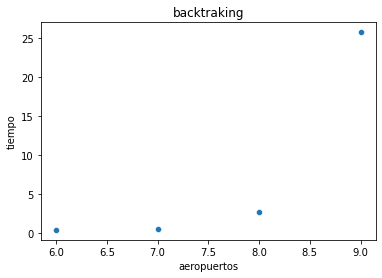

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_o(data, algorithm):
    plot_df = data.loc[data.algoritmo == algorithm].groupby("aeropuertos").tiempo.agg(lambda x: x.mean().total_seconds()).reset_index()
    sns.scatterplot(x = plot_df.aeropuertos, y = plot_df.tiempo)
    plt.title(algorithm)
    plt.savefig(f"{algorithm}_order.png")

plot_o(data, "backtraking")

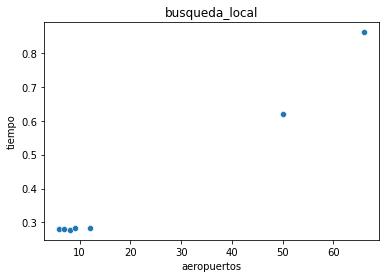

In [24]:
plot_o(data, "busqueda_local")

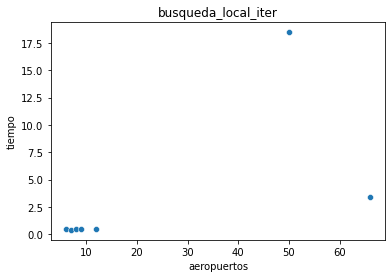

In [25]:
plot_o(data, "busqueda_local_iter")

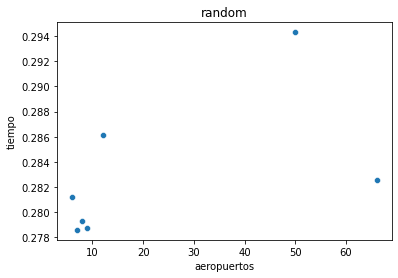

In [12]:
plot_o(data, "random")

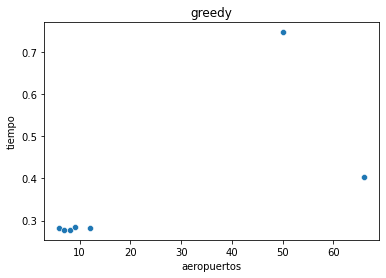

In [13]:
plot_o(data, "greedy")

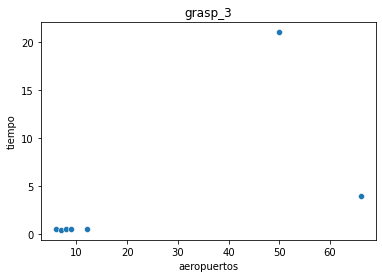

In [14]:
plot_o(data, "grasp_3")

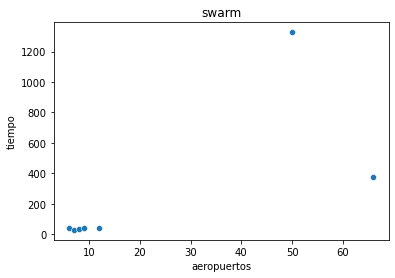

In [15]:
plot_o(data, "swarm")

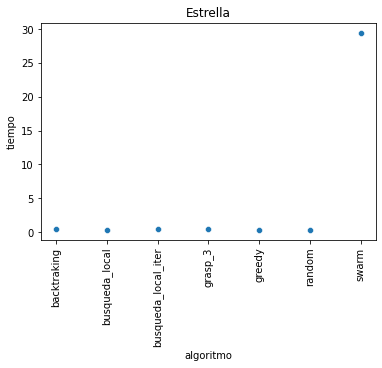

In [82]:
def plot_o(data, region):
    plot_df = data.loc[data.algoritmo.isin(["backtraking", "random","busqueda_local", "busqueda_local_iter", "greedy", "grasp_3", "swarm"])]
    plot_df = plot_df.loc[data.region == region].groupby("algoritmo").tiempo.agg(lambda x: x.mean().total_seconds()).reset_index()
    sns.scatterplot(x = plot_df.algoritmo, y = plot_df.tiempo)
    plt.title(region)
    plt.xticks(rotation=90)
    plt.savefig(f"{region}_order.png")

plot_o(data, "Estrella")

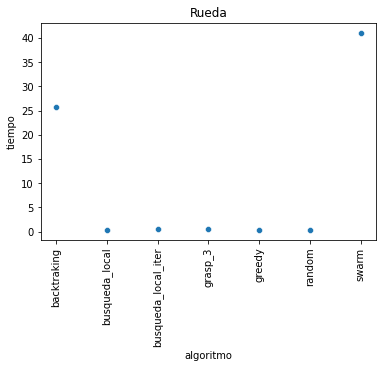

In [83]:
plot_o(data, "Rueda")

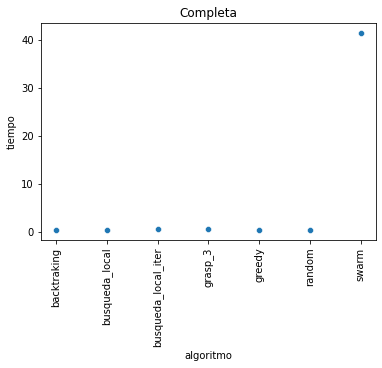

In [84]:
plot_o(data, "Completa")

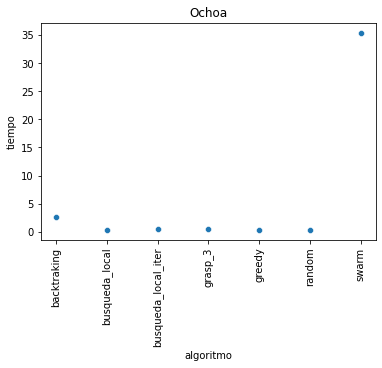

In [85]:
plot_o(data, "Ochoa")

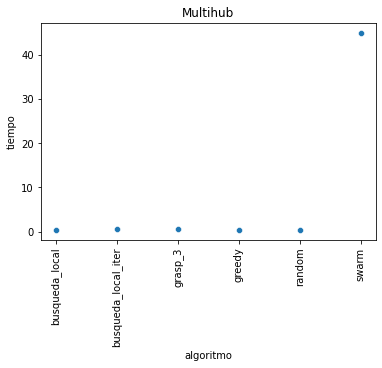

In [86]:
plot_o(data, "Multihub")

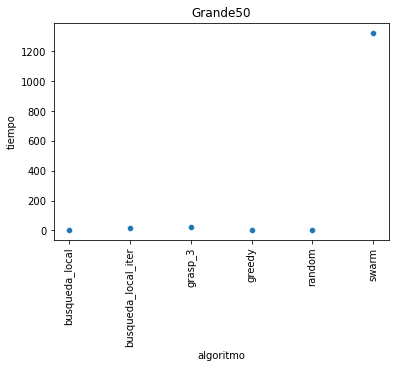

In [87]:
plot_o(data, "Grande50")

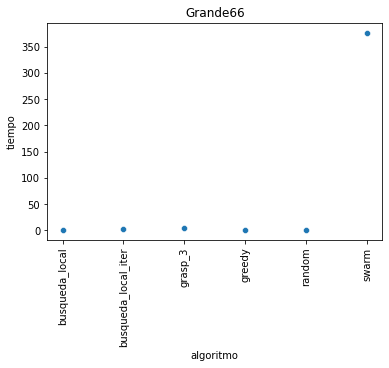

In [88]:
plot_o(data, "Grande66")

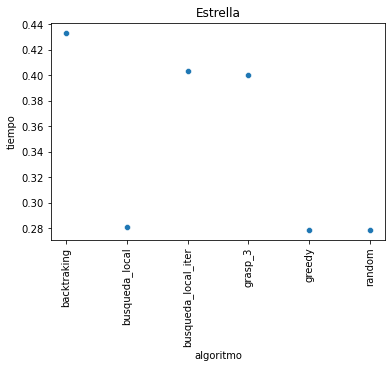

In [89]:
def plot_o(data, region):
    plot_df = data.loc[data.algoritmo.isin(["backtraking", "busqueda_local", "busqueda_local_iter", "greedy", "grasp_3", "random"])]
    plot_df = plot_df.loc[data.region == region].groupby("algoritmo").tiempo.agg(lambda x: x.mean().total_seconds()).reset_index()
    sns.scatterplot(x = plot_df.algoritmo, y = plot_df.tiempo)
    plt.title(region)
    plt.xticks(rotation=90)
    plt.savefig(f"{region}_order_without_swarm.png")

plot_o(data, "Estrella")

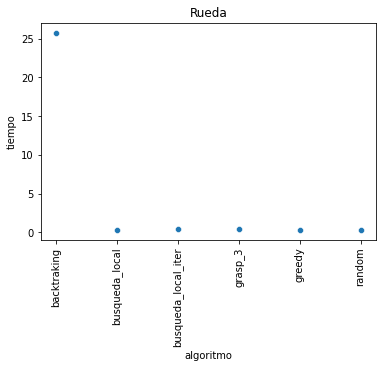

In [90]:
plot_o(data, "Rueda")

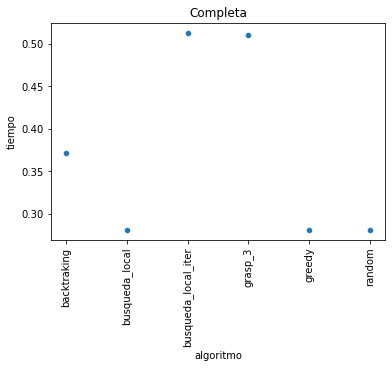

In [91]:
plot_o(data, "Completa")

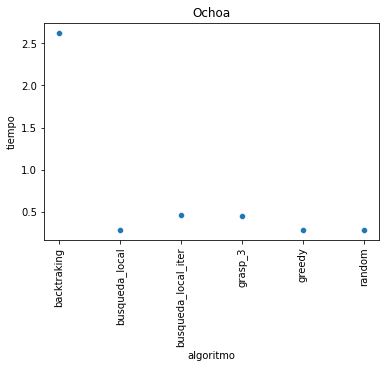

In [92]:
plot_o(data, "Ochoa")

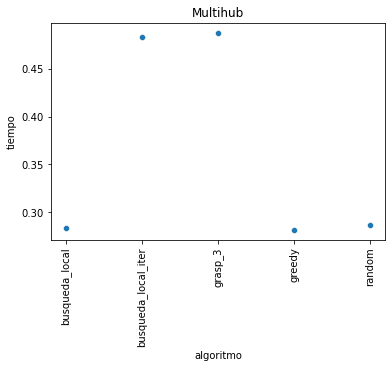

In [93]:
plot_o(data, "Multihub")

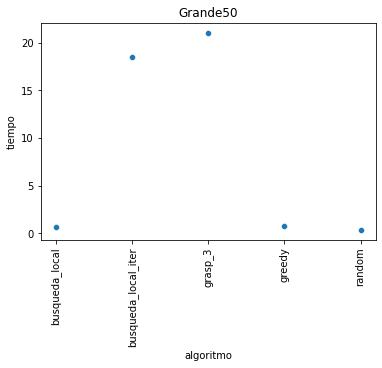

In [94]:
plot_o(data, "Grande50")

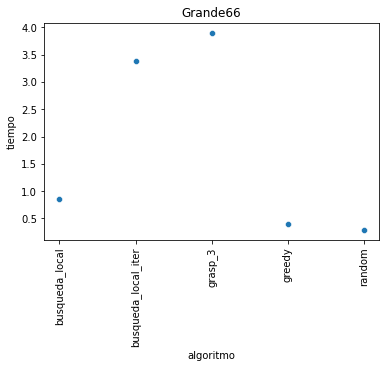

In [95]:
plot_o(data, "Grande66")

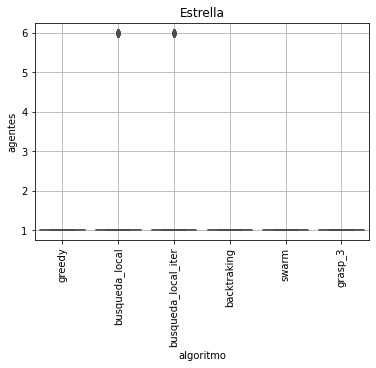

In [55]:
def plot_sol(data, region):
    plot_df = data.loc[data.algoritmo.isin(["backtraking", "busqueda_local", "busqueda_local_iter", "greedy", "grasp_3", "swarm"])]
    plot_df = plot_df.loc[data.region == region][["algoritmo", "agentes"]]
    sns.boxplot(x = plot_df.algoritmo, y = plot_df.agentes, color = "cyan")
    plt.title(region)
    plt.grid()
    plt.xticks(rotation=90)
    plt.savefig(f"{region}_solutions.png")
    
plot_sol(data, "Estrella")

In [52]:
data.region.unique()

array(['Estrella', 'Completa', 'Rueda', 'Ochoa', 'Multihub', 'Grande66',
       'Grande50'], dtype=object)

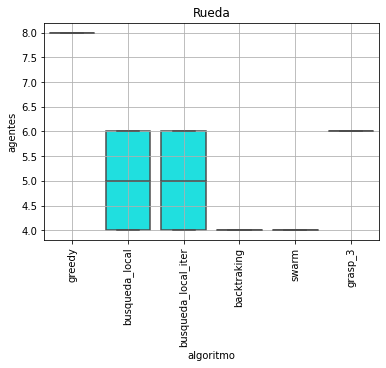

In [56]:
plot_sol(data, "Rueda")

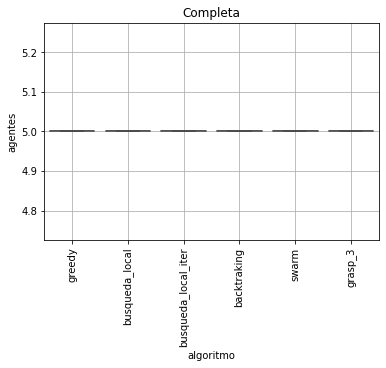

In [58]:
plot_sol(data, "Completa")

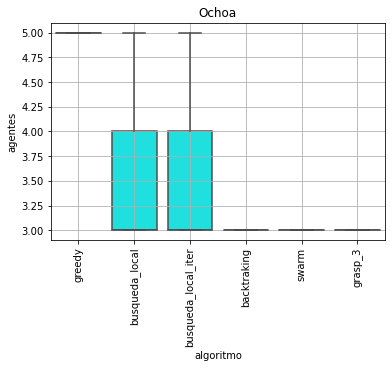

In [59]:
plot_sol(data, "Ochoa")

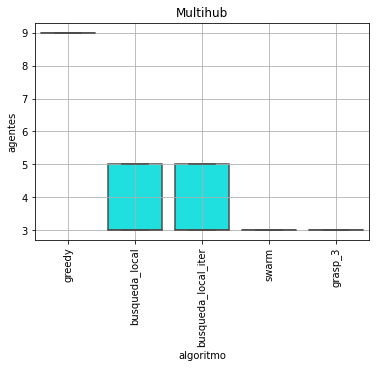

In [60]:
plot_sol(data, "Multihub")

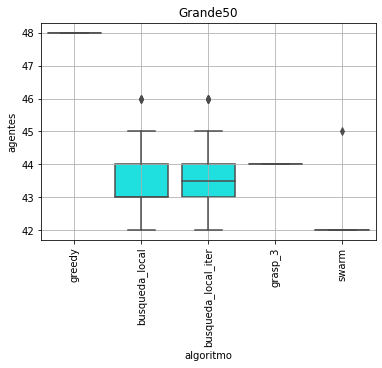

In [61]:
plot_sol(data, "Grande50")

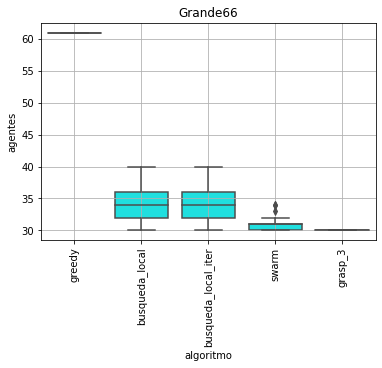

In [62]:
plot_sol(data, "Grande66")